In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

Observed Trend 1: The amount of drivers in a city is inversely correlated with average fares

Observed Trend 2: Urban cities have the most drivers and lowest average fares, while rural cities have the least
amount of drivers and highest average fares.

Observed Trend 3: Rural areas make more per driver than drivers in urban areas

In [17]:
city_data_csv_path = os.path.join('raw_data', 'city_data.csv')
city_data_df = pd.read_csv(city_data_csv_path)

ride_data_csv_path = os.path.join('raw_data', 'ride_data.csv')
ride_data_df = pd.read_csv(ride_data_csv_path)

In [18]:
merged_data_df = pd.merge(ride_data_df,city_data_df,on='city',how='outer')
merged_data_df.head(3)


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban


In [19]:
merged_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [20]:
city_group_df = merged_data_df.groupby('city')


#Average Fare ($) Per City
city_fare_avg = city_group_df['fare'].mean()

#Total Number of Rides Per City
city_ride_count = city_group_df['ride_id'].count()

#Total Number of Drivers Per City
city_driver_count = city_group_df['driver_count'].mean()

#City Type (Urban, Suburban, Rural)
city_type = city_group_df['type'].unique()

In [21]:
city_group_df_new = pd.DataFrame({'Average Fare':city_fare_avg,
                                  'Total Rides':city_ride_count,
                                  'Total Drivers':city_driver_count,
                                 'City Type':city_type})

city_group_df_new.head(3)

,Average Fare,City Type,Total Drivers,Total Rides
city,,,,
Alvarezhaven,23.928710,[Urban],21,31
Alyssaberg,20.609615,[Urban],67,26
Anitamouth,37.315556,[Suburban],16,9


In [22]:
city_group_df_urban = city_group_df_new.loc[city_group_df_new['City Type'] == 'Urban']
urb_af = city_group_df_urban['Average Fare']
urb_rc = city_group_df_urban['Total Rides']
urb_dc = city_group_df_urban['Total Drivers']

city_group_df_sub = city_group_df_new.loc[city_group_df_new['City Type'] == 'Suburban']
sub_af = city_group_df_sub['Average Fare']
sub_rc = city_group_df_sub['Total Rides']
sub_dc = city_group_df_sub['Total Drivers']

city_group_df_rur = city_group_df_new.loc[city_group_df_new['City Type'] == 'Rural']
rur_af = city_group_df_rur['Average Fare']
rur_rc = city_group_df_rur['Total Rides']
rur_dc = city_group_df_rur['Total Drivers']

In [23]:
#city_group_df_new.groupby([city_type])
#city_group_df_new = city_group_df_new.unique()
#city_group_df_new.head()

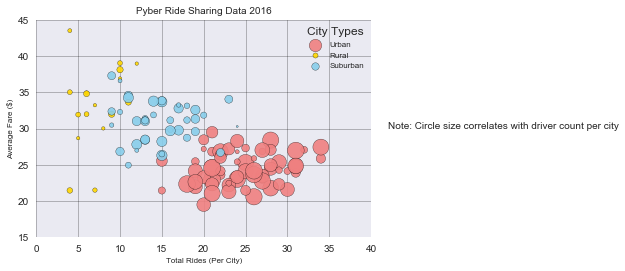

In [28]:
plt.scatter(x=urb_rc, y=urb_af, s=urb_dc*4,c='lightcoral',edgecolors='black', alpha=0.9)
plt.scatter(x=rur_rc, y=rur_af, s=rur_dc*4,c='gold',edgecolors='black', alpha=0.9)
plt.scatter(x=sub_rc, y=sub_af, s=sub_dc*4,c='skyblue',edgecolors='black', alpha=0.9)
plt.legend(['Urban','Rural','Suburban'],title=('City Types'),loc='upper right', fancybox=True,fontsize=8)

plt.title('Pyber Ride Sharing Data 2016',fontsize=10)

plt.xlabel('Total Rides (Per City)',fontsize=8)
plt.ylabel('Average Fare ($)',fontsize=8)

plt.xlim(0,40)
plt.ylim(15,45)

plt.grid(color='black',alpha=0.25)

plt.text(42, 30, 'Note: Circle size correlates with driver count per city', fontsize=10)

sns.set()

plt.show()


In [25]:
total_fares = merged_data_df['fare'].sum()
total_rides = merged_data_df['ride_id'].count()
total_drivers = city_data_df['driver_count'].sum()
city_type_df = merged_data_df.groupby('type')

In [26]:
#* % of Total Fares by City Type
type_fares_percentage = city_type_df['fare'].sum()
type_fares_percentage = type_fares_percentage/total_fares


#* % of Total Rides by City Type
type_rides_percentage = city_type_df['ride_id'].count()
type_rides_percentage = type_rides_percentage/total_rides

#* % of Total Drivers by City Type
type_drivers_percentage = city_data_df.groupby(['type'])[['driver_count']].sum()
type_drivers_percentage = type_drivers_percentage/total_drivers


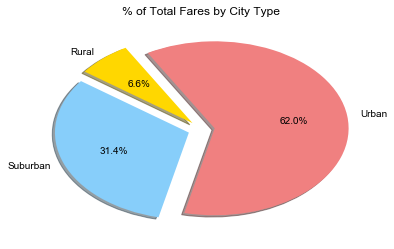

In [27]:
#* % of Total Fares by City Type

plt.pie(type_fares_percentage,
        autopct="%1.1f%%",
        explode = (0.1, 0.1, 0.1), 
        colors = ['gold', 'lightskyblue', 'lightcoral'],
        labels=['Rural','Suburban','Urban'], 
        shadow=True, startangle=120)

plt.title('% of Total Fares by City Type')

plt.show()

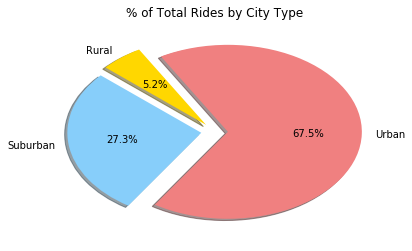

In [13]:
plt.pie(type_rides_percentage, 
        autopct="%1.1f%%",
        explode = (0.1,0.1,0.1),
        colors = ['gold', 'lightskyblue', 'lightcoral'],
        labels=['Rural','Suburban','Urban'], 
        shadow=True,
        startangle=120)

plt.title('% of Total Rides by City Type')

plt.show()

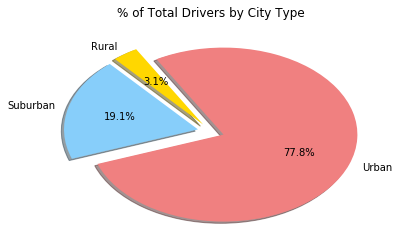

In [14]:
plt.pie(type_drivers_percentage, 
        autopct="%1.1f%%",
        explode = (0.1,0.1,0.1),
        colors = ['gold', 'lightskyblue', 'lightcoral'],
        labels=['Rural','Suburban','Urban'], 
        shadow=True, 
        startangle=120)

plt.title('% of Total Drivers by City Type')

plt.show()